# Movie Rating Prediction Using Python


In [1]:
!pip install -r requirement.txt

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     -------------------- ------------------- 30.7/61.0 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 819.4 kB/s eta 0:00:00
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     ------------------- ------------------- 81.9/162.8 kB 2.3 MB/s eta 0:00:01
     ------------------------------- ------ 133.1/162.8 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 162.8/162.8 kB 1.6 MB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Data Cleaning
### Load the dataset


In [3]:
try:
    data = pd.read_csv("./Dataset/Movie_dataset.csv",encoding='latin1')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")

Dataset loaded successfully.


### Check for missing values


In [4]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


### Handle missing values
### let's remove rows with missing values


In [5]:
data.dropna(inplace=True)

# Exploratory Data Analysis (EDA)


### Distribution of movie ratings


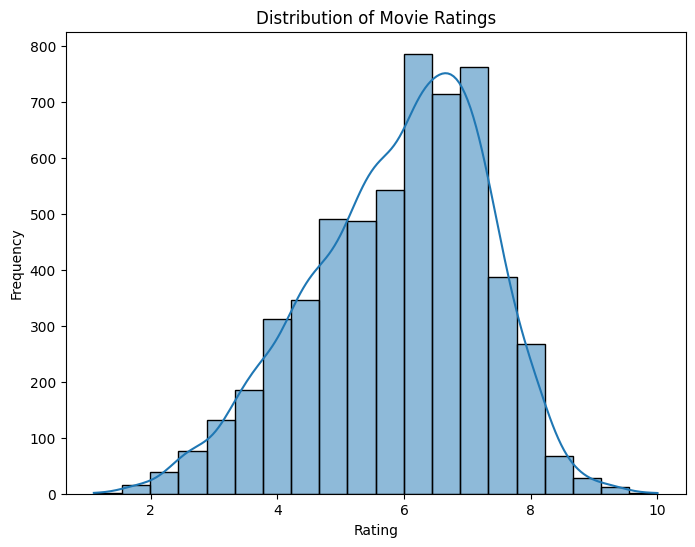

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Rating'], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Feature Engineering


### Extract relevant features

In [7]:
features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
X = data[features]
y = data['Rating']


### encoding for categorical variables


In [8]:
X = pd.get_dummies(X)

# Model Building


### Split the dataset into training and testing sets


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Initialize and train a linear regression model



In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation


### Predictions on the test set


In [11]:
y_pred = model.predict(X_test)


### Model evaluation metrics


In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [13]:
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 1.7573588764916986e+26
R-squared Score: -9.490292461180157e+25


# Interpretation


### Feature coefficients


In [14]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients)

                                 Feature   Coefficient
587               Director_Anirudh Baboo  1.609727e+14
1514           Director_Manjari Makijany  1.167347e+14
543                  Director_Amjad Khan  1.099263e+14
55                 Genre_Action, Fantasy  1.079095e+14
226             Genre_Documentary, Music  8.650287e+13
...                                  ...           ...
1597               Director_Moosa Saleem -7.951278e+13
2054                Director_Ranjan Bose -9.155830e+13
1310  Director_Kamalakara Kameshwara Rao -9.593578e+13
736             Director_Balbir Wadhawan -1.118656e+14
410                Director_Abdul Sattar -1.591840e+14

[9644 rows x 2 columns]


# Plot actual vs predicted ratings


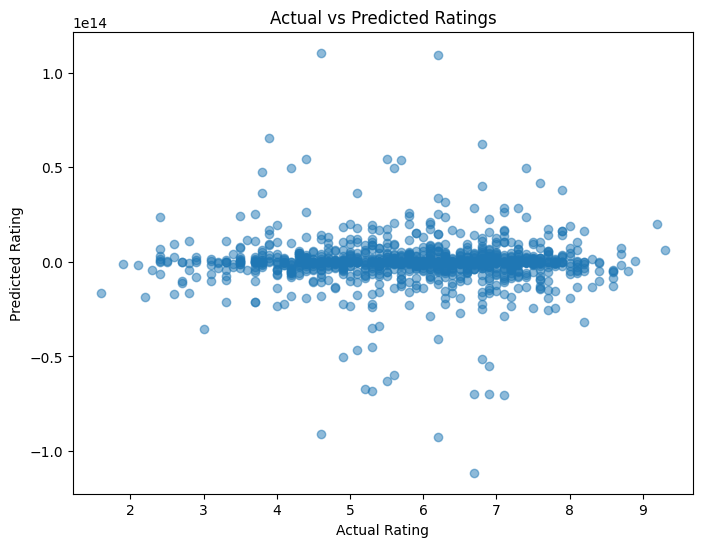

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Ratings")
plt.show()

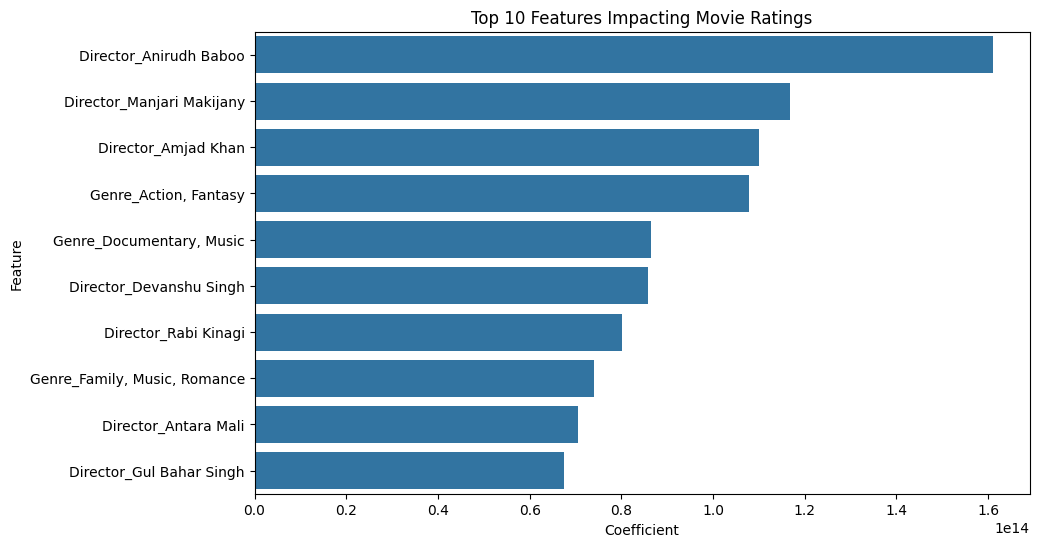

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients.head(10))
plt.title("Top 10 Features Impacting Movie Ratings")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.show()

# Plot residuals vs. predicted ratings

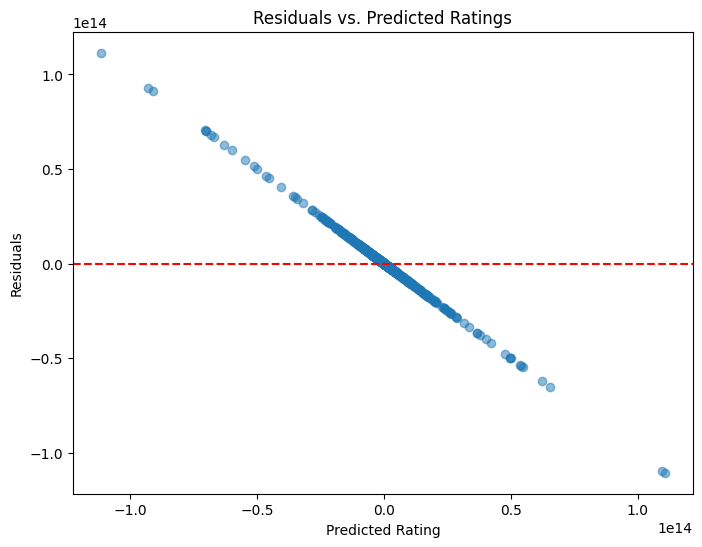

In [17]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title("Residuals vs. Predicted Ratings")
plt.xlabel("Predicted Rating")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()
